# Linear models

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
import lightgbm as lgb

# Load data
train_df = pd.read_csv('../data/processed/dataset_train.csv')
TARGET = 'exam_score'

X = train_df.drop(columns=[TARGET])
y = train_df[TARGET]

# Split data
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print("\n1. LINEAR REGRESSION (Baseline)")
print("-"*60)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
y_valid_pred_lr = lr.predict(X_valid)

print("TRAIN METRICS:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_lr)):.4f}")
print(f"  MAE:  {mean_absolute_error(y_train, y_train_pred_lr):.4f}")
print(f"  R²:   {r2_score(y_train, y_train_pred_lr):.4f}")

print("\nVALID METRICS:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_valid, y_valid_pred_lr)):.4f}")
print(f"  MAE:  {mean_absolute_error(y_valid, y_valid_pred_lr):.4f}")
print(f"  R²:   {r2_score(y_valid, y_valid_pred_lr):.4f}")


1. LINEAR REGRESSION (Baseline)
------------------------------------------------------------
TRAIN METRICS:
  RMSE: 8.8965
  MAE:  7.1024
  R²:   0.7792

VALID METRICS:
  RMSE: 8.8864
  MAE:  7.0931
  R²:   0.7780


In [2]:
# =============================================================================
# 2. RIDGE REGRESSION (L2 Regularization)
# =============================================================================
print("\n\n2. RIDGE REGRESSION (L2 Regularization)")
print("-"*60)

# Thử nhiều alpha values
alphas_ridge = [0.1, 1.0, 10.0, 100.0]
best_alpha_ridge = None
best_rmse_ridge = float('inf')
best_ridge_model = None

for alpha in alphas_ridge:
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train, y_train)
    y_valid_pred = ridge.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
    
    print(f"Alpha={alpha:6.1f} → Valid RMSE: {rmse:.4f}")
    
    if rmse < best_rmse_ridge:
        best_rmse_ridge = rmse
        best_alpha_ridge = alpha
        best_ridge_model = ridge

print(f"\nBest Alpha: {best_alpha_ridge}")
print(f"Best Valid RMSE: {best_rmse_ridge:.4f}")

# Evaluate best Ridge model
y_train_pred_ridge = best_ridge_model.predict(X_train)
y_valid_pred_ridge = best_ridge_model.predict(X_valid)

print("\nFINAL RIDGE METRICS:")
print("TRAIN METRICS:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)):.4f}")
print(f"  MAE:  {mean_absolute_error(y_train, y_train_pred_ridge):.4f}")
print(f"  R²:   {r2_score(y_train, y_train_pred_ridge):.4f}")

print("\nVALID METRICS:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_valid, y_valid_pred_ridge)):.4f}")
print(f"  MAE:  {mean_absolute_error(y_valid, y_valid_pred_ridge):.4f}")
print(f"  R²:   {r2_score(y_valid, y_valid_pred_ridge):.4f}")



2. RIDGE REGRESSION (L2 Regularization)
------------------------------------------------------------
Alpha=   0.1 → Valid RMSE: 8.8864
Alpha=   1.0 → Valid RMSE: 8.8864
Alpha=  10.0 → Valid RMSE: 8.8864
Alpha= 100.0 → Valid RMSE: 8.8864

Best Alpha: 100.0
Best Valid RMSE: 8.8864

FINAL RIDGE METRICS:
TRAIN METRICS:
  RMSE: 8.8965
  MAE:  7.1026
  R²:   0.7792

VALID METRICS:
  RMSE: 8.8864
  MAE:  7.0932
  R²:   0.7780


In [3]:
# =============================================================================
# 3. LASSO REGRESSION (L1 Regularization)
# =============================================================================
print("\n\n3. LASSO REGRESSION (L1 Regularization)")
print("-"*60)

# Thử nhiều alpha values
alphas_lasso = [0.01, 0.1, 1.0, 10.0]
best_alpha_lasso = None
best_rmse_lasso = float('inf')
best_lasso_model = None

for alpha in alphas_lasso:
    lasso = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_valid_pred = lasso.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
    
    # Đếm số features bị zero (feature selection)
    n_features_used = np.sum(lasso.coef_ != 0)
    
    print(f"Alpha={alpha:6.2f} → Valid RMSE: {rmse:.4f} | Features used: {n_features_used}/{len(lasso.coef_)}")
    
    if rmse < best_rmse_lasso:
        best_rmse_lasso = rmse
        best_alpha_lasso = alpha
        best_lasso_model = lasso

print(f"\nBest Alpha: {best_alpha_lasso}")
print(f"Best Valid RMSE: {best_rmse_lasso:.4f}")

# Evaluate best Lasso model
y_train_pred_lasso = best_lasso_model.predict(X_train)
y_valid_pred_lasso = best_lasso_model.predict(X_valid)

print("\nFINAL LASSO METRICS:")
print("TRAIN METRICS:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_lasso)):.4f}")
print(f"  MAE:  {mean_absolute_error(y_train, y_train_pred_lasso):.4f}")
print(f"  R²:   {r2_score(y_train, y_train_pred_lasso):.4f}")

print("\nVALID METRICS:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_valid, y_valid_pred_lasso)):.4f}")
print(f"  MAE:  {mean_absolute_error(y_valid, y_valid_pred_lasso):.4f}")
print(f"  R²:   {r2_score(y_valid, y_valid_pred_lasso):.4f}")



3. LASSO REGRESSION (L1 Regularization)
------------------------------------------------------------
Alpha=  0.01 → Valid RMSE: 8.8874 | Features used: 17/21
Alpha=  0.10 → Valid RMSE: 8.9479 | Features used: 11/21
Alpha=  1.00 → Valid RMSE: 9.8093 | Features used: 6/21
Alpha= 10.00 → Valid RMSE: 15.1297 | Features used: 1/21

Best Alpha: 0.01
Best Valid RMSE: 8.8874

FINAL LASSO METRICS:
TRAIN METRICS:
  RMSE: 8.8980
  MAE:  7.1052
  R²:   0.7791

VALID METRICS:
  RMSE: 8.8874
  MAE:  7.0947
  R²:   0.7779


# Tree-based models

## Base LightGBM

In [6]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

df = pd.read_csv('../data/interim/data_cleaned.csv')

TARGET = 'exam_score'

X = df.drop(columns=[TARGET])
y = df[TARGET]

cat_cols = [
    'gender',
    'course',
    'internet_access',
    'sleep_quality',
    'study_method',
    'facility_rating',
    'exam_difficulty'
]

for col in cat_cols:
    X[col] = X[col].astype('category')


print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f"Train: {X_train.shape}")
print(f"Valid: {X_valid.shape}")

# Train LightGBM
lgbm = lgb.LGBMRegressor(
    n_estimators=3000,
    learning_rate=0.02,
    num_leaves=127,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=20,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

lgbm.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_metric='rmse',
    callbacks=[
        lgb.early_stopping(100, verbose=True),
        lgb.log_evaluation(50)
    ]
)

Features: (630000, 11)
Target: (630000,)
Train: (504000, 11)
Valid: (126000, 11)
Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 11.3606	training's l2: 129.062	valid_1's rmse: 11.3375	valid_1's l2: 128.539
[100]	training's rmse: 9.35728	training's l2: 87.5587	valid_1's rmse: 9.36763	valid_1's l2: 87.7525
[150]	training's rmse: 8.89737	training's l2: 79.1632	valid_1's rmse: 8.92556	valid_1's l2: 79.6656
[200]	training's rmse: 8.77725	training's l2: 77.0402	valid_1's rmse: 8.81914	valid_1's l2: 77.7773
[250]	training's rmse: 8.73174	training's l2: 76.2433	valid_1's rmse: 8.78686	valid_1's l2: 77.2088
[300]	training's rmse: 8.70564	training's l2: 75.7881	valid_1's rmse: 8.7736	valid_1's l2: 76.976
[350]	training's rmse: 8.68585	training's l2: 75.444	valid_1's rmse: 8.76658	valid_1's l2: 76.853
[400]	training's rmse: 8.66929	training's l2: 75.1566	valid_1's rmse: 8.76255	valid_1's l2: 76.7823
[450]	training's rmse: 8.65405	training's l2: 74.8926	valid_1'

,boosting_type,'gbdt'
,num_leaves,127
,max_depth,-1
,learning_rate,0.02
,n_estimators,3000
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [7]:
# Feature Importance
feature_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': lgbm.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_imp.head(10).to_string(index=False))

# import joblib
# joblib.dump(lgbm, '../models/lgbm_base.pkl')


Top 10 Important Features:
         feature  importance
class_attendance       38763
     study_hours       38616
     sleep_hours       32812
             age       13490
 facility_rating       11783
   sleep_quality       10868
          course       10667
    study_method       10066
          gender        8196
 exam_difficulty        7259


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

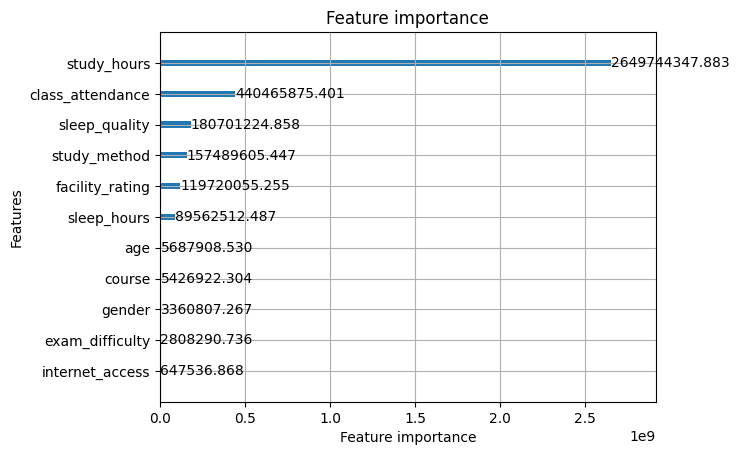

In [8]:
lgb.plot_importance(lgbm, importance_type="gain")

## LightGBM with FE

In [4]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

train_df = pd.read_csv('../data/processed/dataset_train.csv')

TARGET = 'exam_score'

X = train_df.drop(columns=[TARGET])
y = train_df[TARGET]


X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print(f"Train shape: {X_train.shape}")
print(f"Valid shape: {X_valid.shape}")


lgbm = lgb.LGBMRegressor(
    n_estimators=3000,
    learning_rate=0.02,
    num_leaves=63,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=40,
    reg_alpha=0.2,
    reg_lambda=0.3,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)


lgbm.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_metric='rmse',
    callbacks=[
        lgb.early_stopping(100, verbose=True),
        lgb.log_evaluation(50)
    ]
)

print(f"\nBest iteration: {lgbm.best_iteration_}")
print(f"Best RMSE (valid): {lgbm.best_score_['valid_1']['rmse']:.4f}")

y_train_pred = lgbm.predict(X_train)
y_valid_pred = lgbm.predict(X_valid)

print("\n" + "="*50)
print("TRAIN METRICS:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"MAE:  {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"R2:   {r2_score(y_train, y_train_pred):.4f}")

print("\nVALID METRICS:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_valid, y_valid_pred)):.4f}")
print(f"MAE:  {mean_absolute_error(y_valid, y_valid_pred):.4f}")
print(f"R2:   {r2_score(y_valid, y_valid_pred):.4f}")

Train shape: (504000, 21)
Valid shape: (126000, 21)
Training until validation scores don't improve for 100 rounds
[50]	training's rmse: 11.3751	training's l2: 129.392	valid_1's rmse: 11.3452	valid_1's l2: 128.713
[100]	training's rmse: 9.48586	training's l2: 89.9815	valid_1's rmse: 9.48102	valid_1's l2: 89.8896
[150]	training's rmse: 9.01768	training's l2: 81.3185	valid_1's rmse: 9.0252	valid_1's l2: 81.4543
[200]	training's rmse: 8.87671	training's l2: 78.7959	valid_1's rmse: 8.89051	valid_1's l2: 79.0412
[250]	training's rmse: 8.82527	training's l2: 77.8853	valid_1's rmse: 8.84417	valid_1's l2: 78.2193
[300]	training's rmse: 8.79867	training's l2: 77.4166	valid_1's rmse: 8.82258	valid_1's l2: 77.8379
[350]	training's rmse: 8.78108	training's l2: 77.1073	valid_1's rmse: 8.81037	valid_1's l2: 77.6227
[400]	training's rmse: 8.76546	training's l2: 76.8333	valid_1's rmse: 8.80033	valid_1's l2: 77.4458
[450]	training's rmse: 8.75188	training's l2: 76.5955	valid_1's rmse: 8.79212	valid_1's 

In [26]:
import joblib
joblib.dump(lgbm, '../models/lgbm_model.pkl')

['../models/lgbm_model.pkl']

# Compare models

In [7]:
# =============================================================================
# 5. COMPARISON TABLE
# =============================================================================
print("\n\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'LightGBM'],
    'Train RMSE': [
        np.sqrt(mean_squared_error(y_train, y_train_pred_lr)),
        np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)),
        np.sqrt(mean_squared_error(y_train, y_train_pred_lasso)),
        np.sqrt(mean_squared_error(y_train, y_train_pred))
    ],
    'Valid RMSE': [
        np.sqrt(mean_squared_error(y_valid, y_valid_pred_lr)),
        np.sqrt(mean_squared_error(y_valid, y_valid_pred_ridge)),
        np.sqrt(mean_squared_error(y_valid, y_valid_pred_lasso)),
        np.sqrt(mean_squared_error(y_valid, y_valid_pred))
    ],
    'Valid R²': [
        r2_score(y_valid, y_valid_pred_lr),
        r2_score(y_valid, y_valid_pred_ridge),
        r2_score(y_valid, y_valid_pred_lasso),
        r2_score(y_valid, y_valid_pred)
    ],
    'Valid MAE': [
        mean_absolute_error(y_valid, y_valid_pred_lr),
        mean_absolute_error(y_valid, y_valid_pred_ridge),
        mean_absolute_error(y_valid, y_valid_pred_lasso),
        mean_absolute_error(y_valid, y_valid_pred)
    ]
})

# Tính Overfit Gap
results['Overfit Gap'] = results['Train RMSE'] - results['Valid RMSE']

# Sort by Valid RMSE
results = results.sort_values('Valid RMSE')

print(results.to_string(index=False))

# Find best model
best_model_name = results.iloc[0]['Model']
print(f"\nBEST MODEL: {best_model_name}")
print(f"   Valid RMSE: {results.iloc[0]['Valid RMSE']:.4f}")
print(f"   Valid R²:   {results.iloc[0]['Valid R²']:.4f}")
print(f"   Valid MAE:  {results.iloc[0]['Valid MAE']:.4f}")




MODEL COMPARISON SUMMARY
            Model  Train RMSE  Valid RMSE  Valid R²  Valid MAE  Overfit Gap
         LightGBM    8.476879    8.749616  0.784742   6.972499    -0.272737
            Ridge    8.896482    8.886395  0.777960   7.093235     0.010088
Linear Regression    8.896457    8.886428  0.777958   7.093134     0.010029
            Lasso    8.898044    8.887389  0.777910   7.094680     0.010655

BEST MODEL: LightGBM
   Valid RMSE: 8.7496
   Valid R²:   0.7847
   Valid MAE:  6.9725


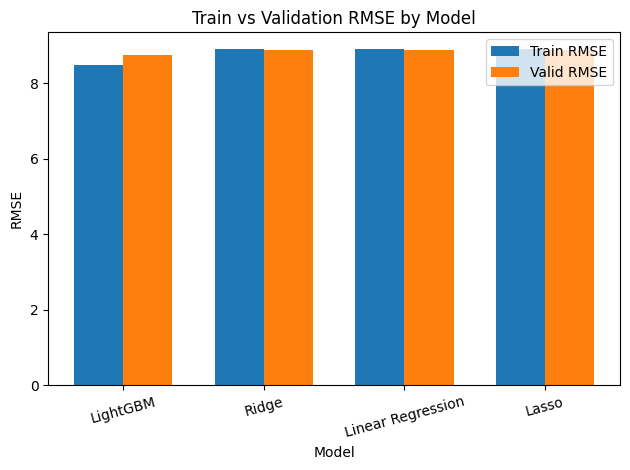

In [9]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.arange(len(results['Model']))
width = 0.35

plt.figure()
plt.bar(x - width/2, results['Train RMSE'], width, label='Train RMSE')
plt.bar(x + width/2, results['Valid RMSE'], width, label='Valid RMSE')

plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Train vs Validation RMSE by Model')
plt.xticks(x, results['Model'], rotation=15)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import LabelEncoder


DATA_CLEAN = Path("../data/interim/data_cleaned.csv")
TEST_RAW = Path("../data/raw/test.csv")
SUBMISSION_OUT = Path("../data/processed/submission_lightgbm.csv")


DROP_COLS = ["age", "gender", "internet_access", "course", "exam_difficulty"]
TARGET = "exam_score"

NUM_BASE = ["study_hours", "class_attendance", "sleep_hours"]
CAT_ONEHOT = ["study_method"]
CAT_ORDINAL = ["sleep_quality", "facility_rating"]

train_df = pd.read_csv(DATA_CLEAN)
train_df = train_df.drop(columns=DROP_COLS)

train_df["study_attend_product"] = train_df["study_hours"] * train_df["class_attendance"]
train_df["sleep_deficit"] = 8 - train_df["sleep_hours"]

NUM_FEATURES = NUM_BASE + ["study_attend_product", "sleep_deficit"]

le_dict = {}
for col in CAT_ONEHOT + CAT_ORDINAL:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    le_dict[col] = le

X = train_df[NUM_FEATURES + CAT_ONEHOT + CAT_ORDINAL]
y = train_df[TARGET]

train_df[NUM_FEATURES + CAT_ONEHOT + CAT_ORDINAL].head()

,study_hours,class_attendance,sleep_hours,study_attend_product,sleep_deficit,study_method,sleep_quality,facility_rating
0,7.91,98.8,4.9,781.508,3.1,3,0,1
1,4.95,94.8,4.7,469.260,3.3,4,2,2
2,4.68,92.6,5.8,433.368,2.2,0,2,0
3,2.00,49.5,8.3,99.000,-0.3,1,0,0
4,7.65,86.9,9.6,664.785,-1.6,4,1,0


## Train/validation split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train: {X_train.shape}, Valid: {X_valid.shape}")

Train: (504000, 8), Valid: (126000, 8)


## Train LightGBM

In [9]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

lgbm = lgb.LGBMRegressor(
    n_estimators=3000,
    learning_rate=0.02,
    num_leaves=127,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=20,
    lambda_l1=0.1,
    lambda_l2=0.1,
    min_split_gain=0.01,
    random_state=42,
)

lgbm.fit(
    X_train,
    y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="rmse",
    callbacks=[
        lgb.early_stopping(100),
        lgb.log_evaluation(50),
    ],
)

valid_pred = lgbm.predict(X_valid, num_iteration=lgbm.best_iteration_)
mse = mean_squared_error(y_valid, valid_pred)
rmse = np.sqrt(mse)
print(f"\n{'='*50}")
print(f"Validation RMSE: {rmse:.4f}")
print(f"Best iteration: {lgbm.best_iteration_}")
print(f"{'='*50}")

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 8
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Start training from score 62.482335
Training until validation scores don'

## Generate predictions for test set

In [ ]:
best_iter = lgbm.best_iteration_ or 3000

lgbm_full = lgb.LGBMRegressor(
    n_estimators=best_iter,
    learning_rate=0.02,
    num_leaves=127,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=20,
    lambda_l1=0.1,
    lambda_l2=0.1,
    min_split_gain=0.01,
    random_state=42,
)
lgbm_full.fit(X, y)

# Load and preprocess test data
test_raw = pd.read_csv(TEST_RAW)

# Drop columns
test_df = test_raw.drop(columns=DROP_COLS)

# Apply same feature engineering
test_df['study_attend_product'] = test_df['study_hours'] * test_df['class_attendance']
test_df['sleep_deficit'] = 8 - test_df['sleep_hours']

# Encode categorical features using the same encoders
for col in CAT_ONEHOT + CAT_ORDINAL:
    test_df[col] = le_dict[col].transform(test_df[col])

# Select features
X_test = test_df[NUM_FEATURES + CAT_ONEHOT + CAT_ORDINAL]

# Predict
submission = pd.DataFrame({
    "id": test_raw["id"],
    "exam_score": lgbm_full.predict(X_test),
})

SUBMISSION_OUT.parent.mkdir(parents=True, exist_ok=True)
submission.to_csv(SUBMISSION_OUT, index=False)

print(f"Submission saved to {SUBMISSION_OUT}")
submission.head()

[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 630000, number of used features: 8
[LightGBM] [Info] Start training from score 62.506672
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
Submission saved to ../data/processed

,id,exam_score
0,630000,70.416394
1,630001,70.488209
2,630002,87.612391
3,630003,57.307602
4,630004,47.541229
